# Сравнение моделей кривой процентных ставок

Сравнительный анализ параметрических моделей для кривой процентных ставок

## Структура анализа

### Часть 1: Nelson-Siegel vs Svensson
Сравнение итеративных моделей с разной степенью сложности:
- **Nelson-Siegel**: 4 параметра (β₀, β₁, β₂, τ)
- **Svensson**: 6 параметров (β₀, β₁, β₂, β₃, τ₁, τ₂)

### Часть 2: Nelson-Siegel vs Diebold-Li  
Сравнение итеративной и аналитической оптимизации:
- **Nelson-Siegel**: 4 параметра, least_squares (итеративная)
- **Diebold-Li**: 3 параметра, OLS (аналитическая), τ=2 фиксирован


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10


## 1. Загрузка данных

In [2]:
df = pd.read_csv('data/data.csv', index_col=0)
df.index = pd.to_datetime(df.index, dayfirst=True)
maturities = df.columns.astype(float).values

## 2. Загрузка результатов моделей

In [3]:
results_dl = pd.read_csv('results/diebold_li_results.csv', index_col=0)
results_dl.index = pd.to_datetime(results_dl.index, format='ISO8601')

results_ns = pd.read_csv('results/nelson_siegel_results.csv', index_col=0)
results_ns.index = pd.to_datetime(results_ns.index, format='ISO8601')

results_svensson = pd.read_csv('results/svensson_results.csv', index_col=0)
results_svensson.index = pd.to_datetime(results_svensson.index, format='ISO8601')

colors = {
    'Diebold-Li': '#1f77b4',
    'Nelson-Siegel': '#ff7f0e',
    'Svensson': '#d62728'
}

# Часть 1: Nelson-Siegel vs Svensson

Сравнение итеративных моделей с разной степенью сложности

## 1.1. Сравнение метрик качества

In [4]:
models_ns_sv = {
    'Nelson-Siegel': results_ns,
    'Svensson': results_svensson
}

summary_data_ns_sv = []
for name, res in models_ns_sv.items():
    summary_data_ns_sv.append({
        'Модель': name,
        'Параметры': {'Nelson-Siegel': 4, 'Svensson': 6}[name],
        'RMSE': res['rmse'].mean(),
        'R²': res['r2'].mean(),
        'MAE': res['mae'].mean()
    })

summary_df_ns_sv = pd.DataFrame(summary_data_ns_sv).sort_values('RMSE')
summary_df_ns_sv

,Модель,Параметры,RMSE,R²,MAE
1,Svensson,6,0.010146,0.999066,0.008355
0,Nelson-Siegel,4,0.020917,0.995712,0.016981


## 1.2. Визуализация динамики метрик

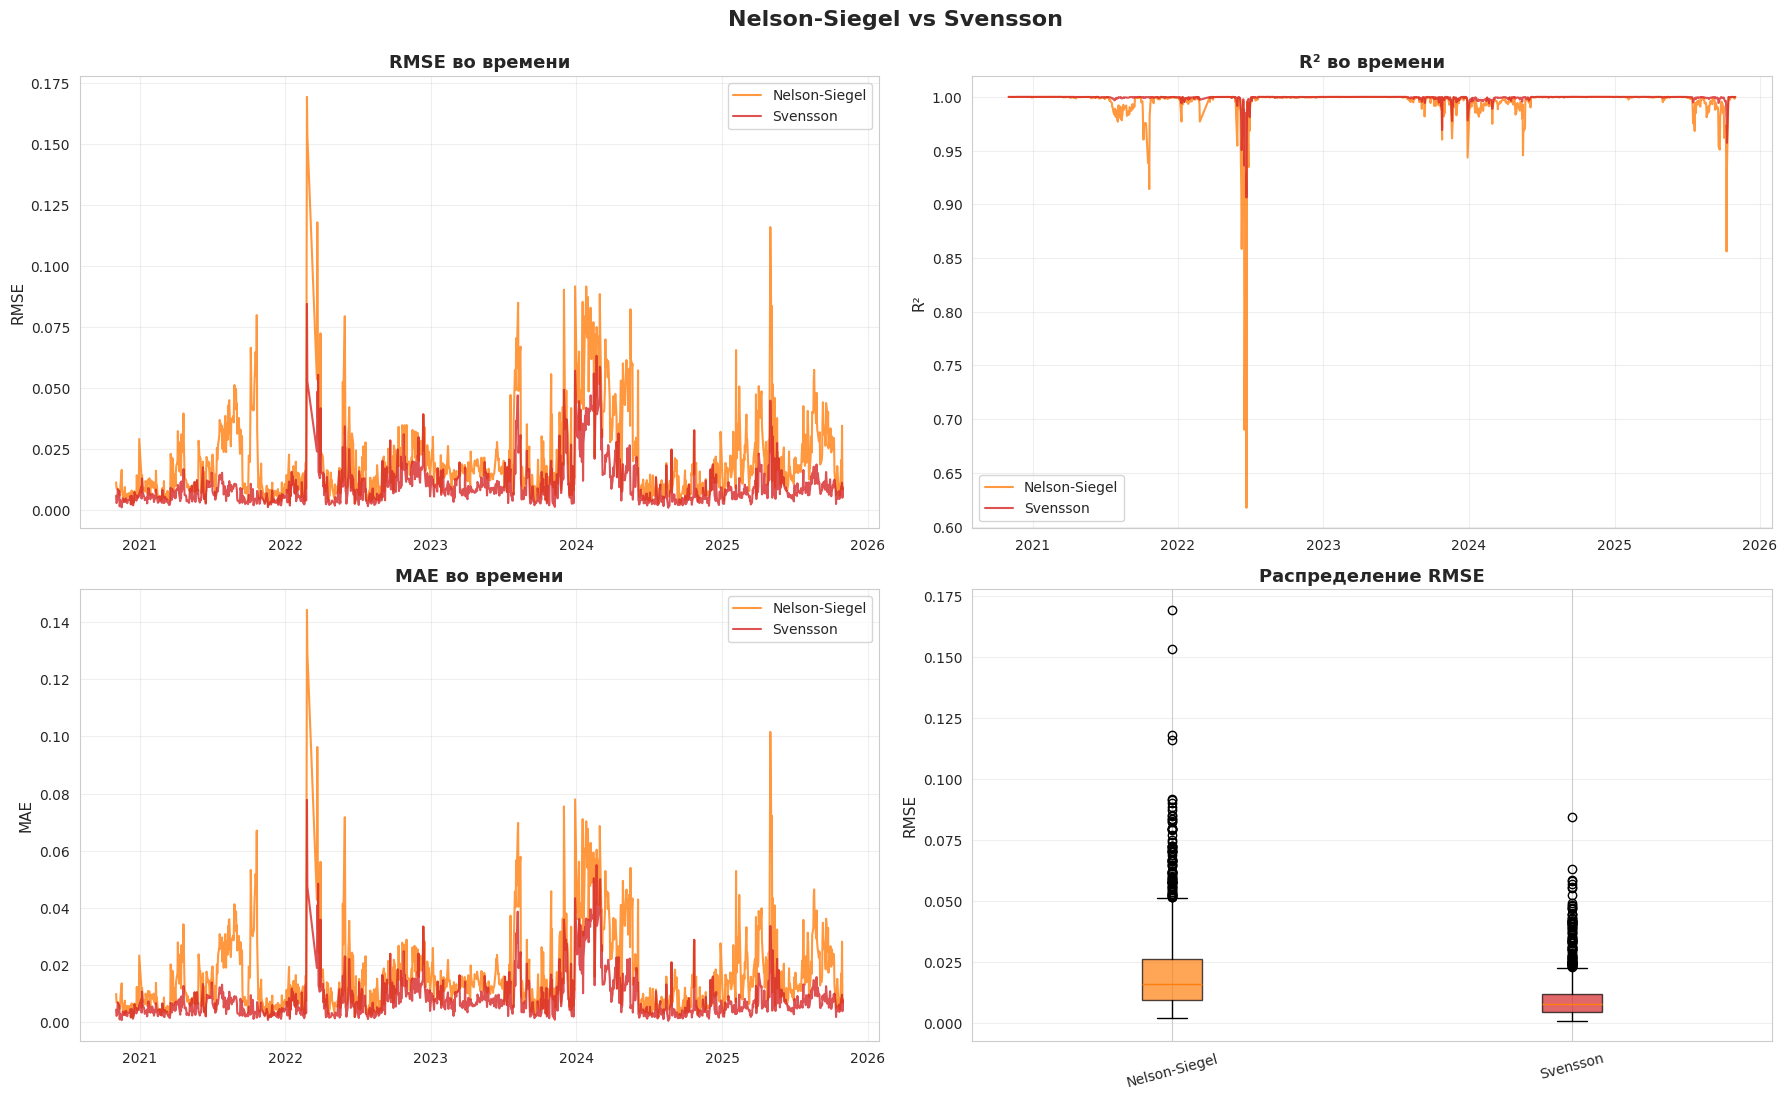

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(18, 11))

for name, res in models_ns_sv.items():
    axes[0, 0].plot(res.index, res['rmse'], linewidth=1.5, label=name, color=colors[name], alpha=0.8)
axes[0, 0].set_title('RMSE во времени', fontsize=13, fontweight='bold')
axes[0, 0].set_ylabel('RMSE', fontsize=11)
axes[0, 0].legend(fontsize=10, loc='best')
axes[0, 0].grid(True, alpha=0.3)

for name, res in models_ns_sv.items():
    axes[0, 1].plot(res.index, res['r2'], linewidth=1.5, label=name, color=colors[name], alpha=0.8)
axes[0, 1].set_title('R² во времени', fontsize=13, fontweight='bold')
axes[0, 1].set_ylabel('R²', fontsize=11)
axes[0, 1].legend(fontsize=10, loc='best')
axes[0, 1].grid(True, alpha=0.3)

for name, res in models_ns_sv.items():
    axes[1, 0].plot(res.index, res['mae'], linewidth=1.5, label=name, color=colors[name], alpha=0.8)
axes[1, 0].set_title('MAE во времени', fontsize=13, fontweight='bold')
axes[1, 0].set_ylabel('MAE', fontsize=11)
axes[1, 0].legend(fontsize=10, loc='best')
axes[1, 0].grid(True, alpha=0.3)

rmse_data = [res['rmse'].values for res in models_ns_sv.values()]
bp = axes[1, 1].boxplot(rmse_data, tick_labels=models_ns_sv.keys(), patch_artist=True)
for patch, name in zip(bp['boxes'], models_ns_sv.keys()):
    patch.set_facecolor(colors[name])
    patch.set_alpha(0.7)
axes[1, 1].set_title('Распределение RMSE', fontsize=13, fontweight='bold')
axes[1, 1].set_ylabel('RMSE', fontsize=11)
axes[1, 1].grid(True, alpha=0.3, axis='y')
axes[1, 1].tick_params(axis='x', rotation=15)

plt.suptitle('Nelson-Siegel vs Svensson', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

## 1.3. Анализ скорости сходимости

Загрузка истории оптимизации

In [6]:
with open('results/nelson_siegel_optimization_history.json', 'r') as f:
    ns_history = json.load(f)

with open('results/svensson_optimization_history.json', 'r') as f:
    svensson_history = json.load(f)

In [7]:
with open('results/nelson_siegel_optimization_history.json', 'r') as f:
    ns_history = json.load(f)

with open('results/svensson_optimization_history.json', 'r') as f:
    svensson_history = json.load(f)


In [8]:
ns_iterations = []
ns_final_costs = []
svensson_iterations = []
svensson_final_costs = []

for date_str in ns_history.keys():
    ns_hist = ns_history[date_str]
    if len(ns_hist) > 0:
        ns_iterations.append(len(ns_hist))
        ns_final_costs.append(ns_hist[-1]['cost'])

for date_str in svensson_history.keys():
    sv_hist = svensson_history[date_str]
    if len(sv_hist) > 0:
        svensson_iterations.append(len(sv_hist))
        svensson_final_costs.append(sv_hist[-1]['cost'])

convergence_stats = pd.DataFrame({
    'Модель': ['Nelson-Siegel', 'Svensson'],
    'Среднее кол-во итераций': [np.mean(ns_iterations), np.mean(svensson_iterations)],
    'Медиана кол-ва итераций': [np.median(ns_iterations), np.median(svensson_iterations)],
    'Макс кол-во итераций': [np.max(ns_iterations), np.max(svensson_iterations)],
    'Средняя финальная ошибка': [np.mean(ns_final_costs), np.mean(svensson_final_costs)]
})

convergence_stats


,Модель,Среднее кол-во итераций,Медиана кол-ва итераций,Макс кол-во итераций,Средняя финальная ошибка
0,Nelson-Siegel,8.919586,7.0,34,0.008972
1,Svensson,184.929140,26.0,1580,0.002222


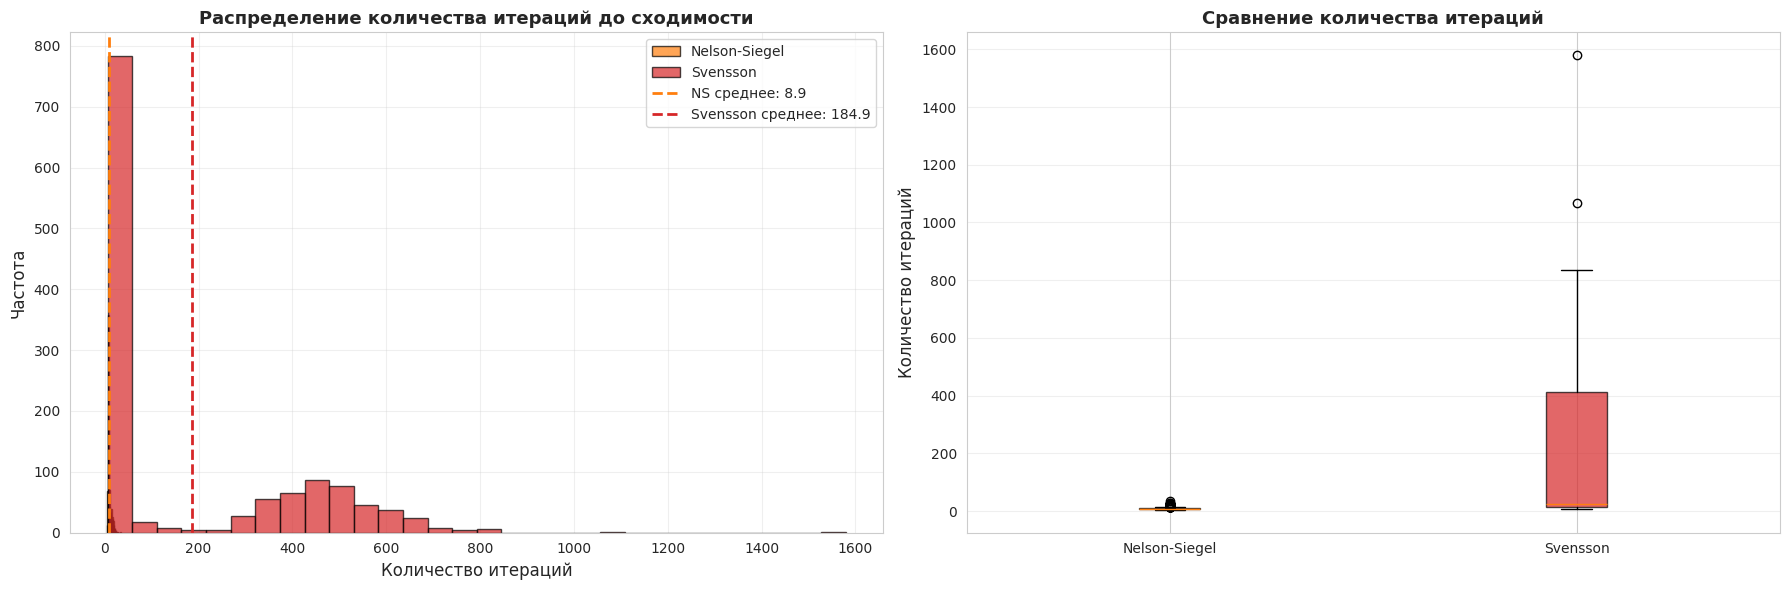

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

axes[0].hist(ns_iterations, bins=30, alpha=0.7, label='Nelson-Siegel', 
             color=colors['Nelson-Siegel'], edgecolor='black')
axes[0].hist(svensson_iterations, bins=30, alpha=0.7, label='Svensson', 
             color=colors['Svensson'], edgecolor='black')
axes[0].axvline(np.mean(ns_iterations), color=colors['Nelson-Siegel'], 
                linestyle='--', linewidth=2, label=f'NS среднее: {np.mean(ns_iterations):.1f}')
axes[0].axvline(np.mean(svensson_iterations), color=colors['Svensson'], 
                linestyle='--', linewidth=2, label=f'Svensson среднее: {np.mean(svensson_iterations):.1f}')
axes[0].set_xlabel('Количество итераций', fontsize=12)
axes[0].set_ylabel('Частота', fontsize=12)
axes[0].set_title('Распределение количества итераций до сходимости', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

bp = axes[1].boxplot([ns_iterations, svensson_iterations], 
                      tick_labels=['Nelson-Siegel', 'Svensson'], 
                      patch_artist=True)
bp['boxes'][0].set_facecolor(colors['Nelson-Siegel'])
bp['boxes'][1].set_facecolor(colors['Svensson'])
for patch in bp['boxes']:
    patch.set_alpha(0.7)
axes[1].set_ylabel('Количество итераций', fontsize=12)
axes[1].set_title('Сравнение количества итераций', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


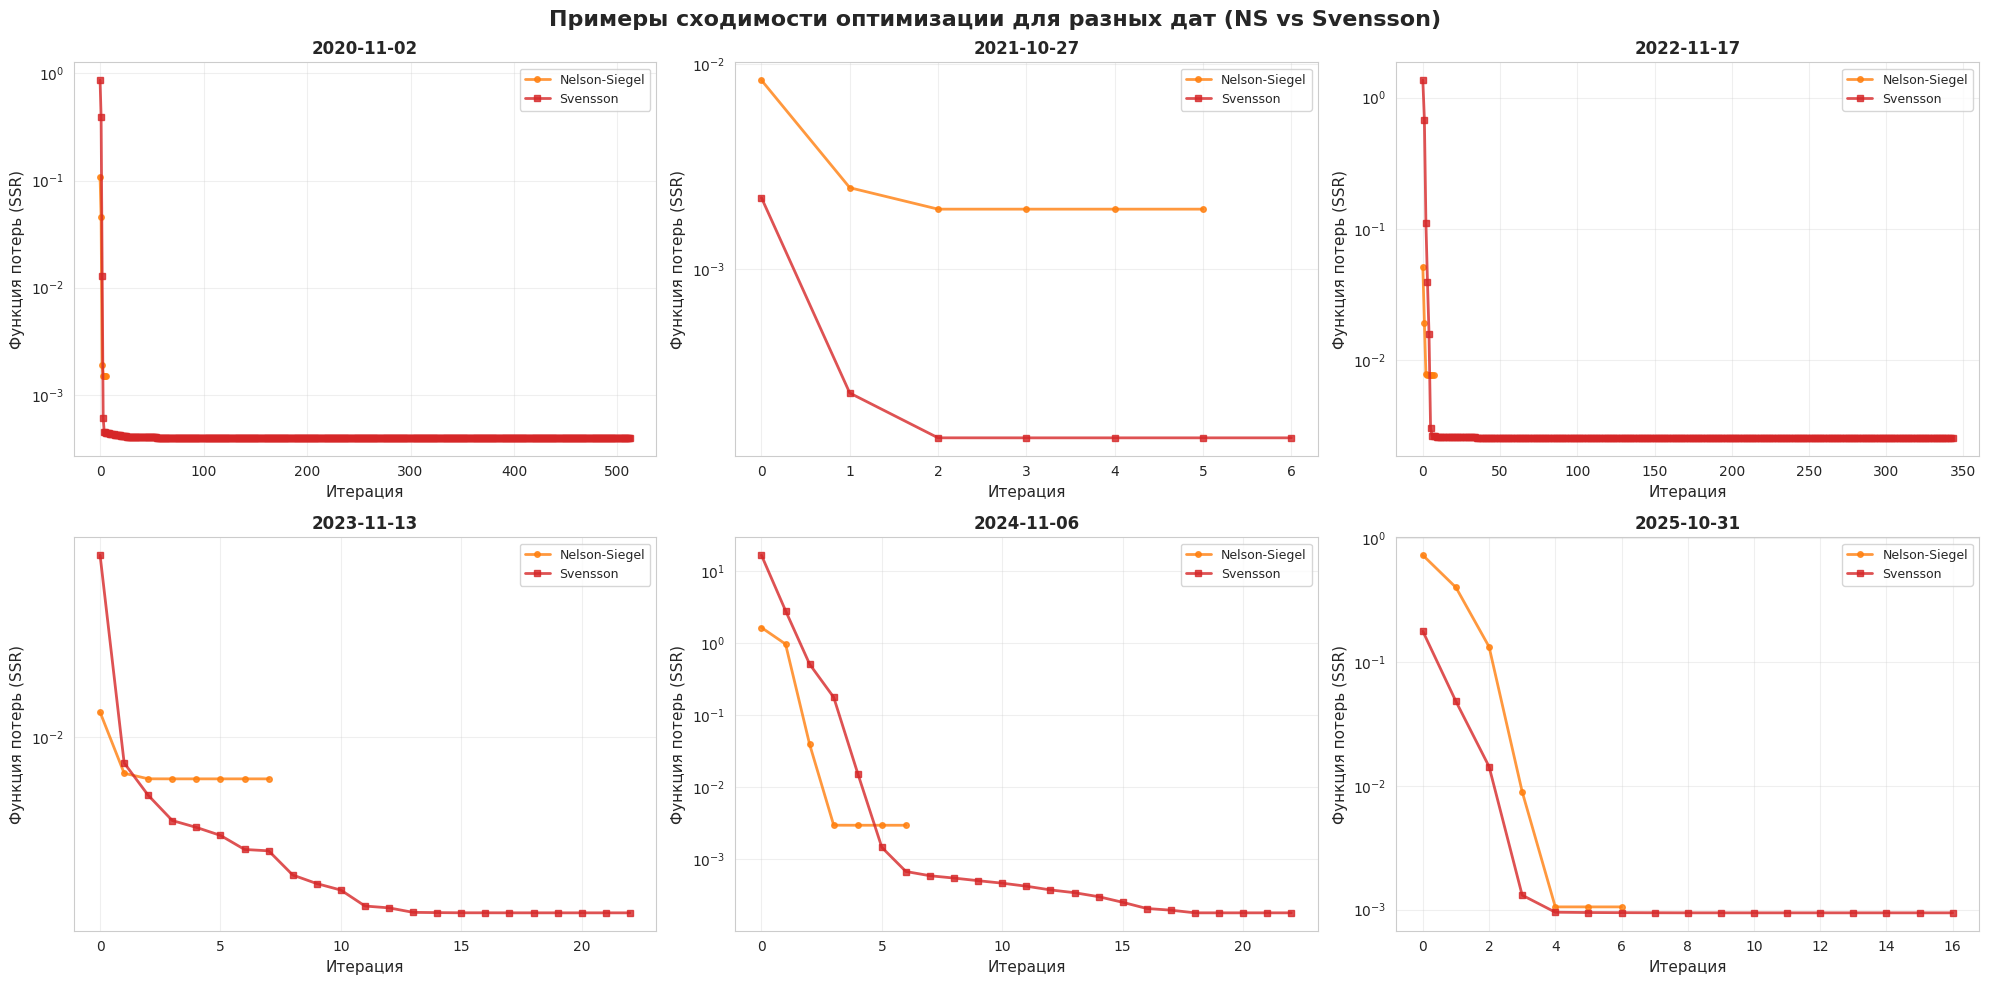

In [10]:
dates_list = list(ns_history.keys())
sample_indices = np.linspace(0, len(dates_list)-1, 6, dtype=int)
sample_dates = [dates_list[i] for i in sample_indices]

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()

for i, date_str in enumerate(sample_dates):
    ns_hist = ns_history[date_str]
    sv_hist = svensson_history[date_str]
    
    if len(ns_hist) > 0:
        ns_costs = [h['cost'] for h in ns_hist]
        axes[i].plot(range(len(ns_costs)), ns_costs, '-o', 
                     color=colors['Nelson-Siegel'], label='Nelson-Siegel', 
                     linewidth=2, markersize=4, alpha=0.8)
    
    if len(sv_hist) > 0:
        sv_costs = [h['cost'] for h in sv_hist]
        axes[i].plot(range(len(sv_costs)), sv_costs, '-s', 
                     color=colors['Svensson'], label='Svensson', 
                     linewidth=2, markersize=4, alpha=0.8)
    
    axes[i].set_xlabel('Итерация', fontsize=11)
    axes[i].set_ylabel('Функция потерь (SSR)', fontsize=11)
    axes[i].set_title(f'{date_str[:10]}', fontsize=12, fontweight='bold')
    axes[i].set_yscale('log')
    axes[i].legend(fontsize=9)
    axes[i].grid(True, alpha=0.3)

plt.suptitle('Примеры сходимости оптимизации для разных дат (NS vs Svensson)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


# Часть 2: Nelson-Siegel vs Diebold-Li

Сравнение итеративной и аналитической оптимизации

## 2.1. Сравнение метрик качества


In [11]:
models_ns_dl = {
    'Diebold-Li': results_dl,
    'Nelson-Siegel': results_ns
}

summary_data_ns_dl = []
for name, res in models_ns_dl.items():
    summary_data_ns_dl.append({
        'Модель': name,
        'Параметры': {'Diebold-Li': 3, 'Nelson-Siegel': 4}[name],
        'RMSE': res['rmse'].mean(),
        'R²': res['r2'].mean(),
        'MAE': res['mae'].mean()
    })

summary_df_ns_dl = pd.DataFrame(summary_data_ns_dl).sort_values('RMSE')
summary_df_ns_dl


,Модель,Параметры,RMSE,R²,MAE
1,Nelson-Siegel,4,0.020917,0.995712,0.016981
0,Diebold-Li,3,0.120277,0.926478,0.099840


## 2.2. Визуализация динамики метрик


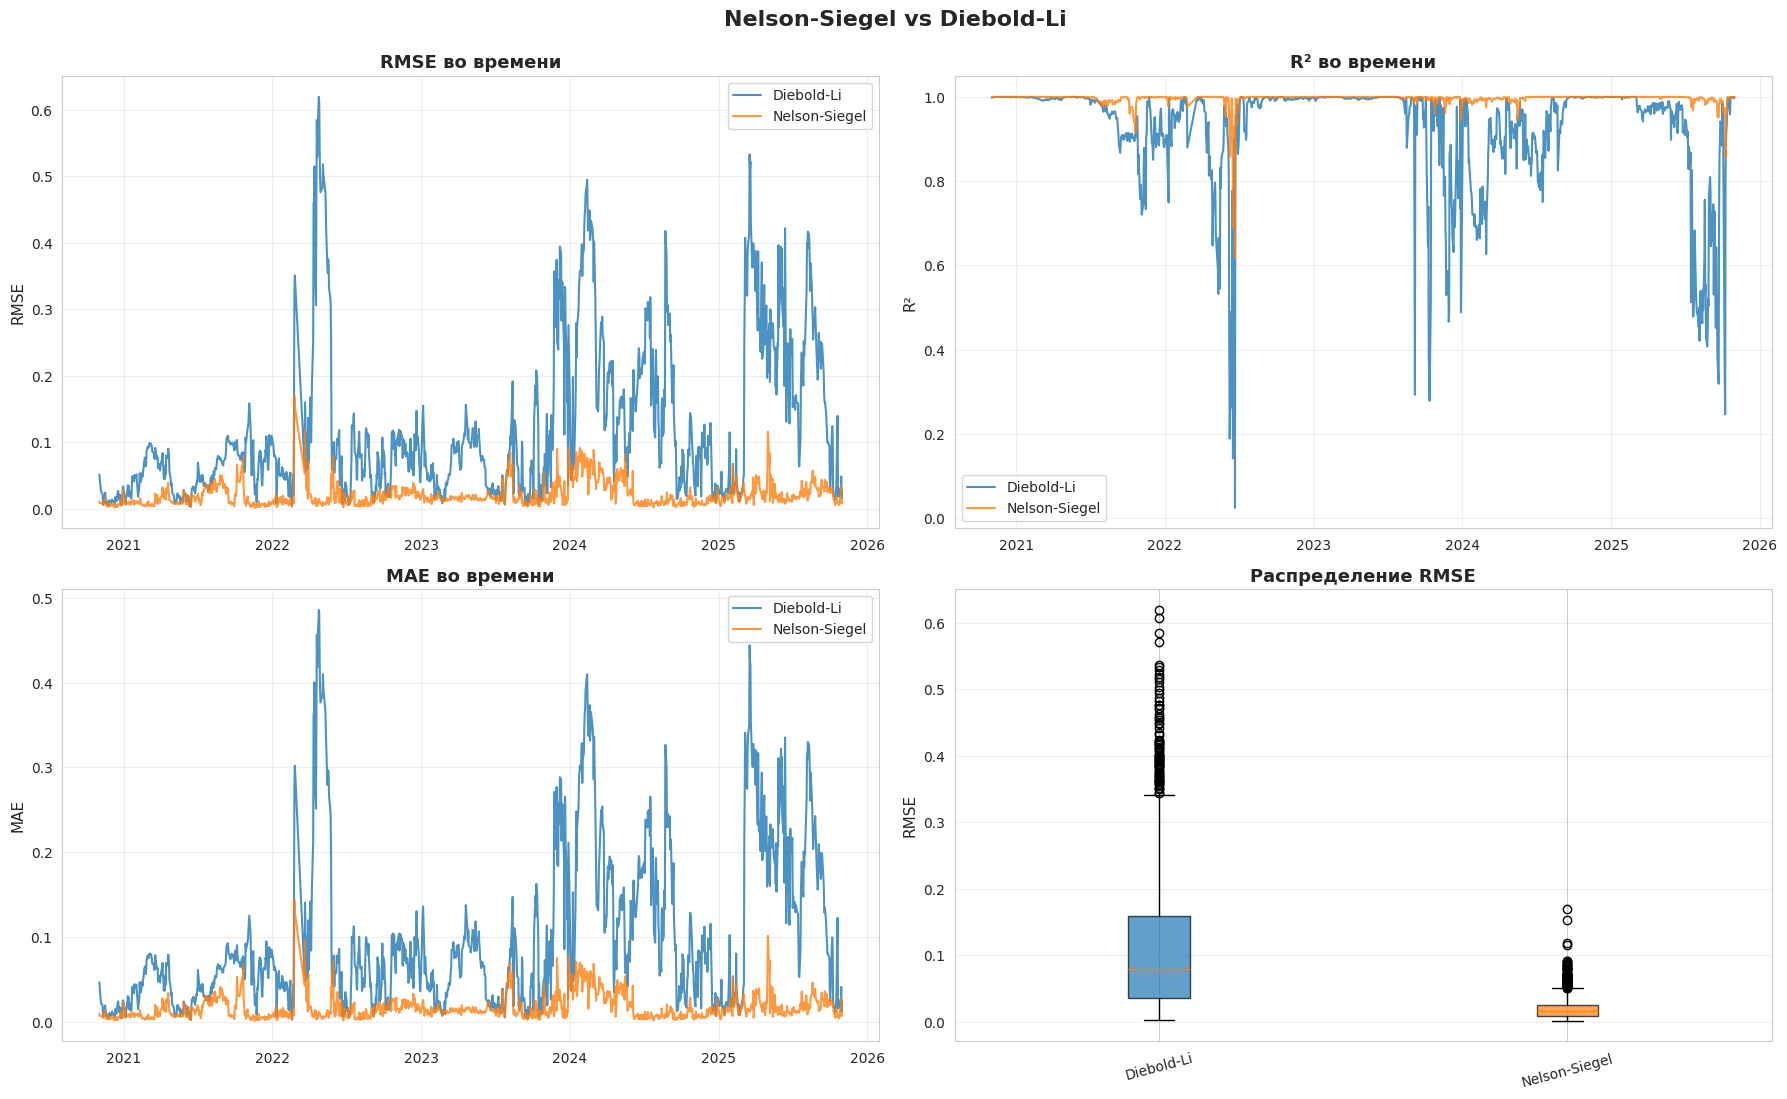

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(18, 11))

for name, res in models_ns_dl.items():
    axes[0, 0].plot(res.index, res['rmse'], linewidth=1.5, label=name, color=colors[name], alpha=0.8)
axes[0, 0].set_title('RMSE во времени', fontsize=13, fontweight='bold')
axes[0, 0].set_ylabel('RMSE', fontsize=11)
axes[0, 0].legend(fontsize=10, loc='best')
axes[0, 0].grid(True, alpha=0.3)

for name, res in models_ns_dl.items():
    axes[0, 1].plot(res.index, res['r2'], linewidth=1.5, label=name, color=colors[name], alpha=0.8)
axes[0, 1].set_title('R² во времени', fontsize=13, fontweight='bold')
axes[0, 1].set_ylabel('R²', fontsize=11)
axes[0, 1].legend(fontsize=10, loc='best')
axes[0, 1].grid(True, alpha=0.3)

for name, res in models_ns_dl.items():
    axes[1, 0].plot(res.index, res['mae'], linewidth=1.5, label=name, color=colors[name], alpha=0.8)
axes[1, 0].set_title('MAE во времени', fontsize=13, fontweight='bold')
axes[1, 0].set_ylabel('MAE', fontsize=11)
axes[1, 0].legend(fontsize=10, loc='best')
axes[1, 0].grid(True, alpha=0.3)

rmse_data = [res['rmse'].values for res in models_ns_dl.values()]
bp = axes[1, 1].boxplot(rmse_data, tick_labels=models_ns_dl.keys(), patch_artist=True)
for patch, name in zip(bp['boxes'], models_ns_dl.keys()):
    patch.set_facecolor(colors[name])
    patch.set_alpha(0.7)
axes[1, 1].set_title('Распределение RMSE', fontsize=13, fontweight='bold')
axes[1, 1].set_ylabel('RMSE', fontsize=11)
axes[1, 1].grid(True, alpha=0.3, axis='y')
axes[1, 1].tick_params(axis='x', rotation=15)

plt.suptitle('Nelson-Siegel vs Diebold-Li', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()
